In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

full_data = pd.read_csv("Files/intraDataFile1F.csv", index_col=False)
full_data

,Frame,PosY,PosX,Size,BestMode,BestModeCost,Variance,coCost,AboveCost,LeftCost,...,Cost25,Cost26,Cost27,Cost28,Cost29,Cost30,Cost31,Cost32,Cost33,Cost34
0,0,0,0,0,1,11891.300,32.703400,-1,-1.000,-1.000,...,-1.0,12375.10,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,0,0,0,1,0,3976.420,40.139400,-1,-1.000,-1.000,...,-1.0,4034.33,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0,0,0,2,0,1871.340,6.211760,-1,-1.000,-1.000,...,-1.0,1929.25,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,0,0,0,3,0,1116.260,0.190476,-1,-1.000,-1.000,...,-1.0,1174.17,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0,0,0,4,0,2289.080,0.190476,-1,-1.000,-1.000,...,-1.0,2290.08,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461027,0,25,51,3,11,278.817,5.015870,-1,578.542,226.817,...,-1.0,-1.00,879.267,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
461028,0,25,51,4,11,447.359,5.015870,-1,235.817,157.817,...,-1.0,-1.00,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
461029,0,25,51,4,11,159.817,5.015870,-1,235.817,447.359,...,-1.0,-1.00,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
461030,0,25,51,4,11,142.817,5.015870,-1,447.359,134.817,...,-1.0,-1.00,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [2]:
data = full_data[['BestMode', 'Size']] #extrai as colunas dos atributos categoricos
mod_data = full_data

for dta in data:
    cod = LabelBinarizer()
    cod.fit(data[dta])
    
    #generate header column list
    classes = cod.classes_.tolist() 
    column_name = []
    for num in classes:
        column_name.append(dta + str(num))
        
    binarized = cod.transform(data[dta])    
    onehot = pd.DataFrame(binarized, columns=list(column_name)) #create DF with feature headers             
    mod_data = pd.concat([mod_data,onehot], axis=1).drop([dta], axis=1) 
    
mod_data.to_csv("Files/modIntraData.csv")

# Analisando os dados

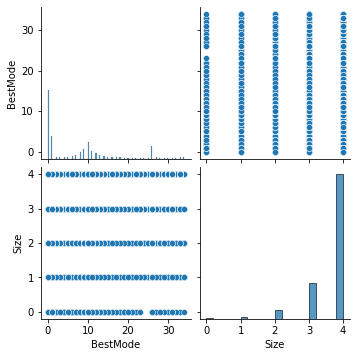

In [3]:
sns.pairplot(data)
plt.show()